# Numpy vs Pandas vs Objects for agent modeling

Trying to see whether there's any reason not to use Pandas

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

np.random.seed(1) # Fix seed

Tests case:

* A bunch of objects, each with (x,y) coordinates.
* Calculate pairwise distances between objects.
* For each object, update the distance to the closest object.

Technical solutions we'll compare:

* One pandas frame
* One global object with saveral numpy properties
* Each object remembers its own value

In [126]:
class Case_p:
    """Option with Pandas."""
    def __init__(self,n=100):
        self.data = pd.DataFrame({'x': np.random.rand(n) , 'y': np.random.rand(n), 'val': [0]*n})
    
    def distances(self,i):
        """Distances from object i to all other objects."""
        d = self.data
        return np.sqrt((d.x-d.x[i])**2 + (d.y-d.y[i])**2)
    
    def update(self,i,value):
        self.data.loc[i,'val'] = value
        
        
class Case_n:
    """Option with numpy."""
    def __init__(self,n=100):
        self.xy  = np.random.rand(n,2)
        self.val = np.zeros(n)
    
    def distances(self,i):
        """Distances from object i to all other objects."""
        return np.sqrt(np.sum((self.xy-self.xy[i,:])**2,axis=1))
    
    def update(self,i,value):
        self.val[i] = value
        
        
class Case_o:
    """Option with objects."""
    class Node:
        def __init__(self,x=None,y=None,val=None):
            self.x = x
            self.y = y
            self.val = val
            
        def distance(self,other):
            return np.sqrt((self.x-other.x)**2 + (self.y-other.y)**2)
        
        def update(self,val):
            self.val = val        
    
    def __init__(self,n=100):
        self.Nodes = []
        for i in range(n):
            self.Nodes.append(Case_o.Node(np.random.rand(),np.random.rand(),0))
            
    def distances(self,i):
        """Distances from object i to all other objects."""
        return [self.Nodes[i].distance(nj) for nj in self.Nodes]
    
    def update(self,i,value):
        self.Nodes[i].update(value)
        
class Case_e:
    """Empthy class."""
    def __init__(self,n=100):
        pass
    
    def distances(self,i):
        return [1]
    
    def update(self,i,value):
        pass
        
# .

In [146]:
# Test case:
n_iterations = 10
nobj_list = [(i+1)*100 for i in range(10)]

objects_list = [Case_e,Case_o,Case_n,Case_p]
names_list = ['Empty','Objects','Numpy','Pandas']

out = np.zeros((len(nobj_list),len(names_list)))

for inobj in range(len(nobj_list)):
    nobj = nobj_list[inobj]
    #print(nobj,' objects')
    for io in range(len(objects_list)):
        tic = time.time()
        t = objects_list[io](nobj)
        for _ in range(n_iterations):
            for i in range(nobj): # Intentional unavoidable imperfection
                d = t.distances(i)
                t.update(i,min(d))
        time_passed = time.time()-tic
        out[inobj,io] = time_passed
        #print(names_list[io],':',time_passed)
        print('.',end='')
    print('|',end='')
        
out

....
....
....
....
....
....
....
....
....
....


array([[1.00016594e-03, 1.71009779e-01, 1.80010796e-02, 7.05040455e-01],
       [9.99927521e-04, 6.05034590e-01, 6.30037785e-02, 1.42008114e+00],
       [2.00009346e-03, 1.34907699e+00, 1.11006498e-01, 2.19412565e+00],
       [2.00009346e-03, 2.42513871e+00, 1.93010807e-01, 3.09717727e+00],
       [2.00033188e-03, 3.89422250e+00, 2.80016184e-01, 3.64820838e+00],
       [3.00025940e-03, 5.68232512e+00, 3.87022018e-01, 4.47925639e+00],
       [3.00002098e-03, 7.57743335e+00, 5.23030043e-01, 5.19529724e+00],
       [3.99994850e-03, 1.00235734e+01, 7.58043528e-01, 6.21335530e+00],
       [5.00035286e-03, 1.24987152e+01, 8.66049290e-01, 6.94039702e+00],
       [5.00059128e-03, 1.53308768e+01, 1.02605867e+00, 7.82044721e+00]])

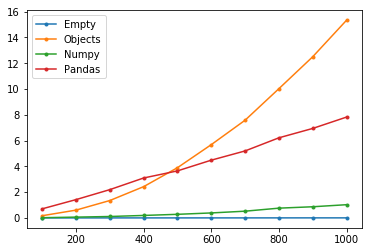

In [148]:
plt.plot(nobj_list,out,'.-');
plt.legend(names_list);

**Conclusion:** Obviously, numpy is the best. So the trick is to have a well-designed set of global vectors.